<a href="https://colab.research.google.com/github/TMTucker1/DAS511/blob/main/DAS511_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import plotly.express as px
import numpy as np

from google.colab import files
uploaded = files.upload()



Saving Software3.csv to Software3.csv


In [23]:
import report_util
data = pd.read_csv('Software3.csv', delimiter=',', header=0)
df = pd.DataFrame(data)

#initial Functions
Total_Count = data['ID'].count()
Vendor_Count = data['ProductVendor'].value_counts().to_frame()
Vendor_Count_Persentage = data['ProductVendor'].value_counts(normalize=True).to_frame()*100

#GroupBys
Vendor_GB = df.groupby('ProductVendor').count().reset_index()
Vendor_GB1 = df.groupby('ProductVendor')['SoftwareLocation'].value_counts().transpose()
Vendor_GB2 = df.groupby('ProductVendor')['SoftwareType'].value_counts()
Location_GB1 = df.groupby('SoftwareLocation').count().reset_index()
Location = df['SoftwareType'].value_counts()

#Max license info
Vendor_Max_num = Vendor_Count.max().tolist()
Vendor_Max_idx = Vendor_Count.idxmax(axis = 0).tolist()
Vendor_Max_P = Vendor_Count_Persentage.max().tolist()

#Min license info
Vendor_Min_num = Vendor_Count.min().tolist()
Vendor_Min_idx = Vendor_Count.idxmin(axis = 0).tolist()
Vendor_Min_P = Vendor_Count_Persentage.min().tolist()

def generate_report(dataset):
    report = report_util.Report("Evaluation of Software License Utilization")

    section = report.add_section("Dataset Stats")
    paragraph = section.add_paragraph()
    
  

#Paragraph #1
    paragraph.append(f"The dataset has {Total_Count} lines of data. ") 
    paragraph.append(f"{Vendor_Max_idx} has the largest number of licenses with {Vendor_Max_num} which equals {Vendor_Max_P}%. ")
    paragraph.append(f"{Vendor_Min_idx} has the smallest number of licenses with {Vendor_Min_num} which equals {Vendor_Min_P}%. ")
    paragraph.append(f"The dataset average value is {mean} with a standard deviation of {standard_deviation}. ")

    paragraph_2 = section.add_paragraph
#############################################################################
#SECTION 1 
#FIRST BAR GRAPH
    fig_1 = section.add_figure()
    fig_1.caption = "License counts by Vendor"
    fig_1 = px.bar(Vendor_GB,
             x='ProductVendor',
             y='ID',
             labels={'ID': 'Number of Licenses', 'ProductVendor':'Name of Vendor'},
             title='License Count by Vendor',
             barmode ='stack')
    fig_1.show()

    paragraph_2.append_cross_reference(fig_1)
    paragraph_2.append(f" shows the amount of licenses each vendor is utilizing.")

#Create Table1
    tbl_1 = section.add_table()
    tbl_1.caption = "Figure 1 Dataset"

    tbl_1.set_header(["Product Vendor","Number of Licenses","Persentage of Total"])
    tbl_1.set_data(Vendor_GB1)###TO DO ...
        
    paragraph_2.append_cross_reference(tbl_1)
    paragraph_2.append(f" shows the numbers associated with the product vendors ")

##########################################################################
#SECTION 2
#SECOND GRAPH
    section_2 = report.add_section("License Count by Environment Location")
    paragraph_3 = section_2.add_paragraph()

#Figure 2
    fig_2 = section.add_figure()

# Bar chart
    fig_2 = px.bar(Location_GB1,
             x='SoftwareLocation',
             y='ID',
             labels={'ID': 'Number of Licenses', 'SoftwareLocation':'Location of Software'},
             title ='License Count by Location',
             barmode ='stack')
# plot
    fig_2.show()

    paragraph_3.append_cross_reference(fig_2)
    paragraph_3.append(f" shows the number of licenses per environment location.")
#Create Table2
    tbl_2 = section.add_table()
    tbl_2.caption = "Figure 2 Dataset"

    tbl_2.set_header(["Software Location", "Number of Licenses"])
    tbl_2.set_data(Vendor_GB2)

##########################################################################

#SECTION 3
    section_3 = report.add_section("License Count by Environment Location")
    paragraph_4 = section_3.add_paragraph()

#Figure 3
    fig_3 = section.add_figure()

# pie chart
    fig_3 = px.pie(df, 
             values = df['SoftwareType'].value_counts(), 
             names = df['SoftwareType'].unique().tolist(), 
             title='Software Licenses by Type')
    fig_3.show()
    

    paragraph_4.append_cross_reference(fig_3)
    paragraph_4.append(f" shows the number of licenses per environment location.")
#Create Table3
    tbl_3 = section.add_table()
    tbl_3.caption = "Figure 3 Dataset"

    tbl_3.set_header(["Software Type","Count"])
    tbl_3.set_data(Location)



#print("1-------")
#print(Vendor_Max_idx, Vendor_Max_num, Vendor_Max_P) 
#print("2-------")
#print(Vendor_Min_idx, Vendor_Min_num, Vendor_Min_P)
#print(Vendor_GB1)
#print("3-------")
#print(Vendor_GB2)
#print("4-------")
#print(Location)
#print("5-------")
print(tbl_3)
#print(Vendor_Count_Persentage)
#print("6-------")

COTS           196
Open Source     46
Freeware        23
IaaS             4
SaaS             1
Other            1
PaaS             1
GOTS             1
Name: SoftwareType, dtype: int64


NameError: ignored

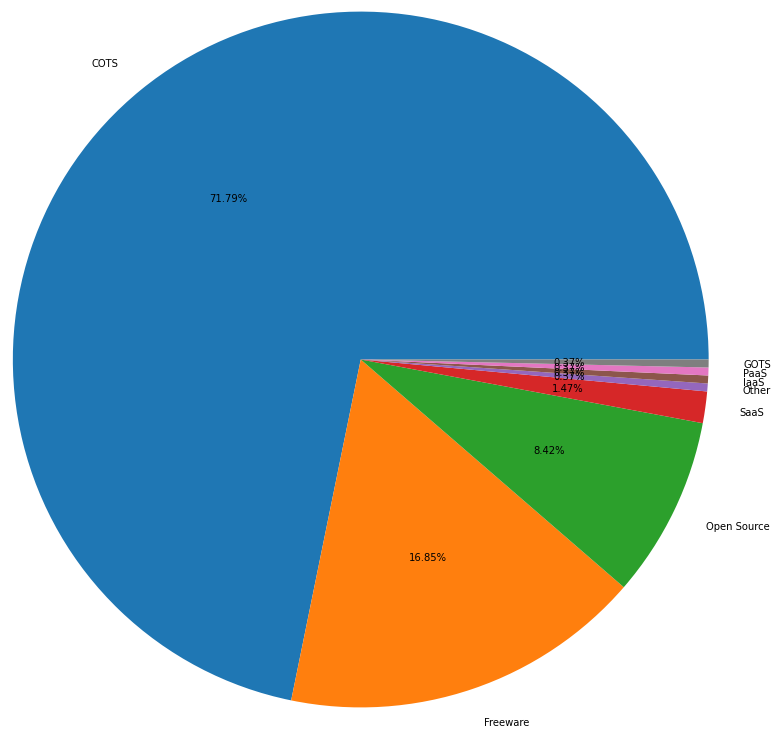

In [24]:
  
# Read and group product vendor
dfg=df.groupby('ProductVendor').count().reset_index()

# Bar chart
fig = px.bar(dfg,
             x='ProductVendor',
             y='ID',
             labels={'ID': 'Number of Licenses', 'ProductVendor':'Name of Vendor'},
             title='License Count by Vendor',
             barmode ='stack')
# plot
fig.show()

#read and group by location
dfg1=df.groupby('SoftwareLocation').count().reset_index()

# Bar chart
fig1 = px.bar(dfg1,
             x='SoftwareLocation',
             y='ID',
             labels={'ID': 'Number of Licenses', 'SoftwareLocation':'Location of Software'},
             title ='License Count by Location',
             barmode ='stack')
# plot
fig1.show()


fig_3 = px.pie(df, 
             values=df['SoftwareType'].value_counts(), 
             names = df['SoftwareType'].unique().tolist(), 
             title='Software Licenses by Type')
fig_3.show()

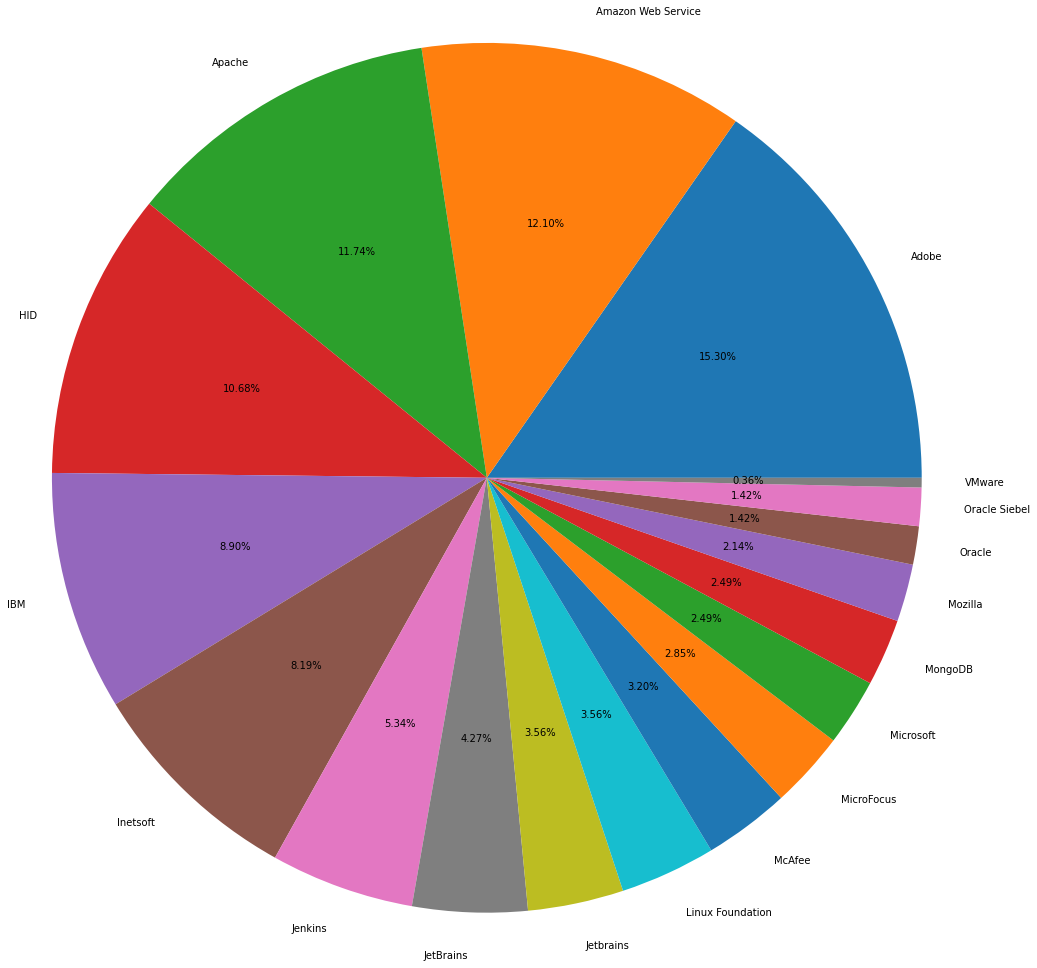

In [ ]:
labels = df['ProductVendor'].unique().tolist()
Vendor_Count = df['ProductVendor'].value_counts()
plt.pie(Vendor_Count, 
        labels = labels,
        autopct='%1.2f%%', 
        radius = 5,)

plt.show()


In [ ]:

fig = px.bar(df, x="ProductVendor", 
             y="ID",
             hover_data = ["ProductName", "SoftwareType"],
             labels={'ID': 'Environment Sotware is Located', 'ProductVendor': 'Name of Vendor'}, 
             
             title = "Vendor counts by Environment")

barmode = 'stack',

fig.show()